# IMPORT DATASET

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

# Example path: 'drive/My Drive/data/your_dataset.xlsx'
file_path = '/content/drive/My Drive/H4H/Chronic_Kidney_Dsease_data.csv'
df = pd.read_csv(file_path)

# Show the first few rows of the dataframe
print(df.head())


Mounted at /content/drive
   PatientID  Age  Gender  Ethnicity  SocioeconomicStatus  EducationLevel  \
0          1   71       0          0                    0               2   
1          2   34       0          0                    1               3   
2          3   80       1          1                    0               1   
3          4   40       0          2                    0               1   
4          5   43       0          1                    1               2   

         BMI  Smoking  AlcoholConsumption  PhysicalActivity  ...   Itching  \
0  31.069414        1            5.128112          1.676220  ...  7.556302   
1  29.692119        1           18.609552          8.377574  ...  6.836766   
2  37.394822        1           11.882429          9.607401  ...  2.144722   
3  31.329680        0           16.020165          0.408871  ...  7.077188   
4  23.726311        0            7.944146          0.780319  ...  3.553118   

   QualityOfLifeScore  HeavyMetalsExposure

# DATA CLEANING (without clinical measurement, PatientID, and DoctorInCharge)

In [ ]:
# List of clinical measurement variables to drop
clinical_measurements = [
    'SystolicBP', 'DiastolicBP', 'FastingBloodSugar', 'HbA1c', 'SerumCreatinine',
    'BUNLevels', 'GFR', 'ProteinInUrine', 'ACR', 'SerumElectrolytesSodium',
    'SerumElectrolytesPotassium', 'SerumElectrolytesCalcium', 'SerumElectrolytesPhosphorus',
    'HemoglobinLevels', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL',
    'CholesterolTriglycerides' , 'DoctorInCharge' , 'PatientID'
]

# Drop these columns
df_clean = df.drop(columns=clinical_measurements)

# Check the first few rows of the cleaned DataFrame to ensure the columns are dropped
print(df_clean.head())

   Age  Gender  Ethnicity  SocioeconomicStatus  EducationLevel        BMI  \
0   71       0          0                    0               2  31.069414   
1   34       0          0                    1               3  29.692119   
2   80       1          1                    0               1  37.394822   
3   40       0          2                    0               1  31.329680   
4   43       0          1                    1               2  23.726311   

   Smoking  AlcoholConsumption  PhysicalActivity  DietQuality  ...  \
0        1            5.128112          1.676220     0.240386  ...   
1        1           18.609552          8.377574     6.503233  ...   
2        1           11.882429          9.607401     2.104828  ...   
3        0           16.020165          0.408871     6.964422  ...   
4        0            7.944146          0.780319     3.097796  ...   

   MuscleCramps   Itching  QualityOfLifeScore  HeavyMetalsExposure  \
0      4.518513  7.556302           76.076800 

# SPLITTING DATASET

In [ ]:
# Import train_test_split from sklearn.model_selection
from sklearn.model_selection import train_test_split

# Assuming 'target' is the name of your target variable
# Replace 'target' with the actual name of your target variable column
X = df_clean.drop('Diagnosis', axis=1)  # Features (all columns except the target)
y = df_clean['Diagnosis']  # Target variable

# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Optionally, check the size of the train and test datasets
print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

Training set size: (1327, 33)
Testing set size: (332, 33)


# CLASS IMBALANCE

In [ ]:
!pip install imbalanced-learn

# Import necessary libraries
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter

# Assuming 'df_clean' is your cleaned DataFrame
X = df_clean.drop('Diagnosis', axis=1)  # Features (all columns except the target)
y = df_clean['Diagnosis']  # Target variable

# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the class distribution before SMOTE
print("Class distribution in training set before SMOTE:", Counter(y_train))

# Apply SMOTE to the training set to handle class imbalance
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check the class distribution after SMOTE
print("Class distribution in training set after SMOTE:", Counter(y_train_resampled))

# Optionally, check the size of the resampled training set
print("Resampled training set size:", X_train_resampled.shape)
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter

# Assuming 'df_clean' is your cleaned DataFrame
X = df_clean.drop('Diagnosis', axis=1)  # Features (all columns except the target)
y = df_clean['Diagnosis']  # Target variable

# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the class distribution before SMOTE
print("Class distribution in training set before SMOTE:", Counter(y_train))

# Apply SMOTE to the training set to handle class imbalance
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check the class distribution after SMOTE
print("Class distribution in training set after SMOTE:", Counter(y_train_resampled))

# Optionally, check the size of the resampled training set
print("Resampled training set size:", X_train_resampled.shape)


Class distribution in training set before SMOTE: Counter({1: 1216, 0: 111})
Class distribution in training set after SMOTE: Counter({1: 1216, 0: 1216})
Resampled training set size: (2432, 33)
Class distribution in training set before SMOTE: Counter({1: 1216, 0: 111})
Class distribution in training set after SMOTE: Counter({1: 1216, 0: 1216})
Resampled training set size: (2432, 33)


# MACHINE LEARNING MODEL

Extra Trees - CV Accuracy Score (mean): 0.9289
XGBoost - CV Accuracy Score (mean): 0.9441
Gradient Boosting - CV Accuracy Score (mean): 0.9166
SVM - CV Accuracy Score (mean): 0.7282

Extra Trees - Classification Report:
              precision    recall  f1-score   support

           0       0.08      0.04      0.05        24
           1       0.93      0.96      0.94       308

    accuracy                           0.89       332
   macro avg       0.50      0.50      0.50       332
weighted avg       0.87      0.89      0.88       332

Accuracy Score: 0.8946

XGBoost - Classification Report:
              precision    recall  f1-score   support

           0       0.11      0.04      0.06        24
           1       0.93      0.97      0.95       308

    accuracy                           0.91       332
   macro avg       0.52      0.51      0.51       332
weighted avg       0.87      0.91      0.89       332

Accuracy Score: 0.9066

Gradient Boosting - Classification Report:
  

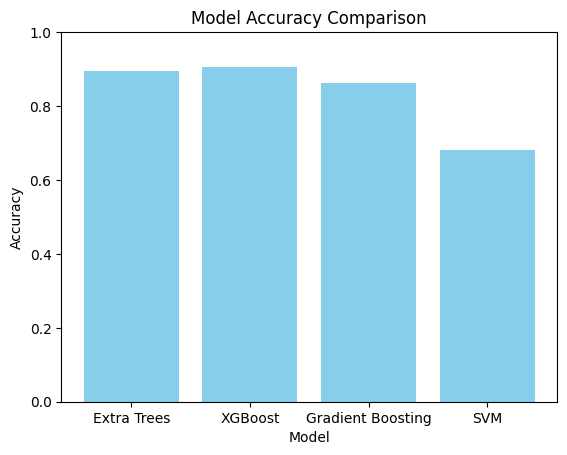

In [ ]:
# Import necessary libraries
from sklearn.ensemble import ExtraTreesClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import numpy as np

# List of models to be evaluated
models = {
    'Extra Trees': ExtraTreesClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'SVM': SVC(random_state=42)
}

# Create a dictionary to store classification reports and scores
classification_reports = {}
accuracy_scores = {}

# Train and evaluate models
for model_name, model in models.items():
    # Fit the model to the resampled training data
    model.fit(X_train_resampled, y_train_resampled)

    # Predict on the test data
    y_pred = model.predict(X_test)

    # Store classification report and accuracy score
    classification_reports[model_name] = classification_report(y_test, y_pred)
    accuracy_scores[model_name] = accuracy_score(y_test, y_pred)

    # Cross-validation score (optional)
    cv_score = cross_val_score(model, X_train_resampled, y_train_resampled, cv=5, scoring='accuracy')
    print(f"{model_name} - CV Accuracy Score (mean): {cv_score.mean():.4f}")

# Print classification reports and accuracy scores for each model
for model_name in models.keys():
    print(f"\n{model_name} - Classification Report:")
    print(classification_reports[model_name])
    print(f"Accuracy Score: {accuracy_scores[model_name]:.4f}")

# Create a bar plot to compare the accuracy scores of all models
model_names = list(models.keys())
accuracy_values = list(accuracy_scores.values())

plt.bar(model_names, accuracy_values, color='skyblue')
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()


# PREDICTIVE MODEL USING XGBOOST

In [ ]:
# Import necessary libraries
import pandas as pd
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score
import joblib

# Train XGBoost model
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train_resampled, y_train_resampled)

# Predict on the test data
y_pred = xgb_model.predict(X_test)

# Generate classification report and accuracy
print("Classification Report for XGBoost:")
print(classification_report(y_test, y_pred))
print(f"Accuracy Score: {accuracy_score(y_test, y_pred):.4f}")

# Prepare test dataset with predictions and severity levels
result_df = X_test.copy()
result_df['Predicted Diagnosis'] = y_pred
result_df['Severity Level'] = result_df['Predicted Diagnosis'].apply(lambda x: 'Low Risk' if x == 0 else 'High Risk')

# Save the result to CSV
output_path = '/content/drive/My Drive/H4H/positive_ckd_lowrisk_highrisk.csv'
result_df.to_csv(output_path, index=False)

print(f"Dataset with severity levels saved to {output_path}")

# Save the trained XGBoost model
model_save_path = '/content/drive/My Drive/H4H/xgboost_ckd_model.pkl'
joblib.dump(xgb_model, model_save_path)
print(f"XGBoost model saved to {model_save_path}")


Classification Report for XGBoost:
              precision    recall  f1-score   support

           0       0.11      0.04      0.06        24
           1       0.93      0.97      0.95       308

    accuracy                           0.91       332
   macro avg       0.52      0.51      0.51       332
weighted avg       0.87      0.91      0.89       332

Accuracy Score: 0.9066
Dataset with severity levels saved to /content/drive/My Drive/H4H/positive_ckd_lowrisk_highrisk.csv
XGBoost model saved to /content/drive/My Drive/H4H/xgboost_ckd_model.pkl


# SEVERITY LEVEL CLASSIFICATION

In [ ]:
# Import necessary libraries
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
import pandas as pd

# Assuming the XGBoost model gives the best accuracy from previous steps
# Fit the XGBoost model to the resampled training data
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train_resampled, y_train_resampled)

# Predict on the test data
y_pred = xgb_model.predict(X_test)

# Print the classification report and accuracy score for XGBoost
print("XGBoost - Classification Report:")
print(classification_report(y_test, y_pred))
print(f"Accuracy Score: {accuracy_score(y_test, y_pred):.4f}")

# Separate the data for Positive CKD (1)
positive_ckd_data = X_test[y_pred == 1]

# Add the target variable (Diagnosis) back to the data
positive_ckd_data['Diagnosis'] = 1

# Add the severity level based on the conditions provided
def classify_severity(row):
    if row['Itching'] >= 9.1 and row['MuscleCramps'] >= 6:
        return 'Very High'
    elif (row['Itching'] >= 7.0 and row['MuscleCramps'] >= 6) or (row['Itching'] >= 9.1 and row['MuscleCramps'] >= 3):
        return 'High'
    elif (row['Itching'] >= 3.0 and row['MuscleCramps'] >= 3) or (row['Itching'] >= 7.0 and row['MuscleCramps'] >= 2):
        return 'Medium'
    else:
        return 'Low'

# Apply the function to classify severity for positive CKD data
positive_ckd_data['Severity_Level'] = positive_ckd_data.apply(classify_severity, axis=1)

# Show the final data with severity levels
print("\nPositive CKD Data with Severity Levels:")
print(positive_ckd_data[['Itching', 'MuscleCramps', 'Severity_Level']])

# First, mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Use shutil to move the file to your Google Drive
import shutil

# Move the file to the specified Google Drive folder
shutil.move('positive_ckd_with_severity.csv', '/content/drive/My Drive/H4H/positive_ckd_with_severity.csv')

print("File moved to Google Drive successfully!")


XGBoost - Classification Report:
              precision    recall  f1-score   support

           0       0.11      0.04      0.06        24
           1       0.93      0.97      0.95       308

    accuracy                           0.91       332
   macro avg       0.52      0.51      0.51       332
weighted avg       0.87      0.91      0.89       332

Accuracy Score: 0.9066

Positive CKD Data with Severity Levels:
       Itching  MuscleCramps Severity_Level
1043  6.066073      5.575213         Medium
352   9.372513      0.435502            Low
1290  3.571893      3.638924         Medium
1047  1.654583      1.821986            Low
1453  4.472883      2.487217            Low
...        ...           ...            ...
1577  5.648067      3.836201         Medium
1169  3.487880      6.943905         Medium
163   0.491504      2.758476            Low
1324  1.907526      4.366982            Low
886   1.728728      5.154680            Low

[323 rows x 3 columns]


<ipython-input-10-16c22d125a17>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  positive_ckd_data['Diagnosis'] = 1
<ipython-input-10-16c22d125a17>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  positive_ckd_data['Severity_Level'] = positive_ckd_data.apply(classify_severity, axis=1)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
File moved to Google Drive successfully!
